In [1]:
# imports necessários
import os
import string

import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import Input, Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from keras.backend import clear_session

Using TensorFlow backend.


In [54]:
%matplotlib inline

In [2]:
# constantes
DIR_DATASET = './dataset/samples/samples/'  # local do dataset
LEN_DATASET = 1070  # 1070 imagens no dataset
LEN_CAPTCH = 5  # 5 letras/números

TARGET_WORDS = string.ascii_lowercase + string.digits
LEN_WORDS = len(TARGET_WORDS)

IMG_SHAPE = (50, 200, 1)  # input shape do modelo
TRAIN_SIZE = int(0.92 * LEN_DATASET) # dataset de treino com 92% do dataset total

In [4]:
# remove os modelos predefinidos
clear_session()

# input do modelo
input_ = Input(shape=IMG_SHAPE)

# camadas de convolução
conv1 = Conv2D(16, kernel_size=(3, 3), padding='same', activation='relu')(input_)
maxp1 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv1)
conv2 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(maxp1)
maxp2 = MaxPooling2D(pool_size=(2, 2), padding='same')(conv2)
conv3 = Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu')(maxp2)
batc1 = BatchNormalization()(conv3)
maxp3 = MaxPooling2D(pool_size=(2, 2), padding='same')(batc1)

# camadas densas
flat1 = Flatten()(maxp3)  # 3D para 1D

# densa para o primeiro caractere
dens1 = Dense(64, activation='relu')(flat1)
drop1 = Dropout(0.5)(dens1)
outp1 = Dense(LEN_WORDS, activation='sigmoid')(drop1)

# densa para o segundo caractere
dens2 = Dense(64, activation='relu')(flat1)
drop2 = Dropout(0.5)(dens2)
outp2 = Dense(LEN_WORDS, activation='sigmoid')(drop2)

# densa para o terceiro caractere
dens3 = Dense(64, activation='relu')(flat1)
drop3 = Dropout(0.5)(dens3)
outp3 = Dense(LEN_WORDS, activation='sigmoid')(drop3)

# densa para o quarto caractere
dens4 = Dense(64, activation='relu')(flat1)
drop4 = Dropout(0.5)(dens4)
outp4 = Dense(LEN_WORDS, activation='sigmoid')(drop4)

# densa para o quinto caractere
dens5 = Dense(64, activation='relu')(flat1)
drop5 = Dropout(0.5)(dens5)
outp5 = Dense(LEN_WORDS, activation='sigmoid')(drop5)

In [5]:
# construção do modelo
model = Model(input_, [outp1, outp2, outp3, outp4, outp5])

# compilando o modelo
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [6]:
# estrutura da rede
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 50, 200, 1)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 50, 200, 16)  160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 25, 100, 16)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 25, 100, 32)  4640        max_pooling2d_1[0][0]            
__________________________________________________________________________________________________
max_poolin

In [7]:
# carregando e processando o dataset

# dados vazios para preencher no laço for
X = np.zeros((LEN_DATASET,) + IMG_SHAPE)
Y = np.zeros((LEN_CAPTCH, LEN_DATASET, LEN_WORDS))

for index, image_name in enumerate(os.listdir(DIR_DATASET)):
    image_path = os.path.join(DIR_DATASET, image_name)  # diretório da imagem
    
    # pegando o nome da imagem que é o valor do captch
    image_target, _ = os.path.splitext(image_name)
    
    # carregando imagem, convertendo para cinza, pixel da imagem entre 0 e 1 e adicionando uma dimensão
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = image / 255.
    image = image[:, :, np.newaxis]
    
    # preenchendo com 1 onde tem a letra/número do output
    target_encode = np.zeros((LEN_CAPTCH, LEN_WORDS))
    for line, word in enumerate(image_target):
        target_encode[line, TARGET_WORDS.index(word)] = 1
    
    X[index] = image
    Y[:, index] = target_encode

In [8]:
# separação dos dados de treino e de teste
x_train, x_test = X[:TRAIN_SIZE], X[TRAIN_SIZE:]
y_train, y_test = Y[:, :TRAIN_SIZE], Y[:, TRAIN_SIZE:]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((984, 50, 200, 1), (5, 984, 36), (86, 50, 200, 1), (5, 86, 36))

In [9]:
# treinamento do modelo
history = model.fit(x_train, [y_train[0], y_train[1], y_train[2], y_train[3], y_train[4]],
                    batch_size=32,  # treinar a cada 32 dados
                    epochs=30,  # treinar 30 vezes
                    validation_split=0.2,  # 20% dos dados utilizar para validar o modelo
                    verbose=1  # apenas printa a barra do treinamento
                   )

Instructions for updating:
Use tf.cast instead.
Train on 787 samples, validate on 197 samples
Epoch 1/30
787/787 [==============================] - 9s 11ms/step - loss: 17.8486 - dense_2_loss: 3.5491 - dense_4_loss: 3.4678 - dense_6_loss: 3.6070 - dense_8_loss: 3.6197 - dense_10_loss: 3.6051 - dense_2_acc: 0.0534 - dense_4_acc: 0.0445 - dense_6_acc: 0.0368 - dense_8_acc: 0.0496 - dense_10_acc: 0.0457 - val_loss: 25.3514 - val_dense_2_loss: 4.9354 - val_dense_4_loss: 5.6727 - val_dense_6_loss: 4.5626 - val_dense_8_loss: 4.8101 - val_dense_10_loss: 5.3704 - val_dense_2_acc: 0.0406 - val_dense_4_acc: 0.0457 - val_dense_6_acc: 0.0000e+00 - val_dense_8_acc: 0.0508 - val_dense_10_acc: 0.0355
Epoch 2/30
787/787 [==============================] - 7s 9ms/step - loss: 16.6783 - dense_2_loss: 3.2660 - dense_4_loss: 3.2514 - dense_6_loss: 3.3933 - dense_8_loss: 3.3996 - dense_10_loss: 3.3680 - dense_2_acc: 0.0584 - dense_4_acc: 0.0546 - dense_6_acc: 0.0534 - dense_8_acc: 0.0546 - dense_10_acc: 0.0

787/787 [==============================] - 7s 9ms/step - loss: 10.9452 - dense_2_loss: 1.7394 - dense_4_loss: 2.2451 - dense_6_loss: 2.3473 - dense_8_loss: 2.4120 - dense_10_loss: 2.2014 - dense_2_acc: 0.3469 - dense_4_acc: 0.1512 - dense_6_acc: 0.1499 - dense_8_acc: 0.2020 - dense_10_acc: 0.1919 - val_loss: 9.0640 - val_dense_2_loss: 1.0576 - val_dense_4_loss: 1.7936 - val_dense_6_loss: 1.9753 - val_dense_8_loss: 2.2881 - val_dense_10_loss: 1.9494 - val_dense_2_acc: 0.7614 - val_dense_4_acc: 0.3604 - val_dense_6_acc: 0.2843 - val_dense_8_acc: 0.3401 - val_dense_10_acc: 0.1472
Epoch 15/30
787/787 [==============================] - 7s 9ms/step - loss: 10.2195 - dense_2_loss: 1.5574 - dense_4_loss: 2.0828 - dense_6_loss: 2.2585 - dense_8_loss: 2.2950 - dense_10_loss: 2.0258 - dense_2_acc: 0.4295 - dense_4_acc: 0.2198 - dense_6_acc: 0.1982 - dense_8_acc: 0.2084 - dense_10_acc: 0.2084 - val_loss: 8.1513 - val_dense_2_loss: 0.8386 - val_dense_4_loss: 1.5124 - val_dense_6_loss: 1.8605 - val_

Epoch 28/30
787/787 [==============================] - 7s 9ms/step - loss: 4.5433 - dense_2_loss: 0.5133 - dense_4_loss: 0.8204 - dense_6_loss: 1.2689 - dense_8_loss: 1.0424 - dense_10_loss: 0.8982 - dense_2_acc: 0.7980 - dense_4_acc: 0.6684 - dense_6_acc: 0.4968 - dense_8_acc: 0.5909 - dense_10_acc: 0.6353 - val_loss: 2.5936 - val_dense_2_loss: 0.0723 - val_dense_4_loss: 0.2952 - val_dense_6_loss: 0.6991 - val_dense_8_loss: 0.8426 - val_dense_10_loss: 0.6845 - val_dense_2_acc: 0.9848 - val_dense_4_acc: 0.9137 - val_dense_6_acc: 0.7766 - val_dense_8_acc: 0.7563 - val_dense_10_acc: 0.7919
Epoch 29/30
787/787 [==============================] - 7s 9ms/step - loss: 4.1950 - dense_2_loss: 0.4195 - dense_4_loss: 0.7656 - dense_6_loss: 1.1902 - dense_8_loss: 1.0019 - dense_10_loss: 0.8178 - dense_2_acc: 0.8297 - dense_4_acc: 0.6989 - dense_6_acc: 0.5095 - dense_8_acc: 0.5921 - dense_10_acc: 0.6785 - val_loss: 2.3484 - val_dense_2_loss: 0.0483 - val_dense_4_loss: 0.2964 - val_dense_6_loss: 0.5

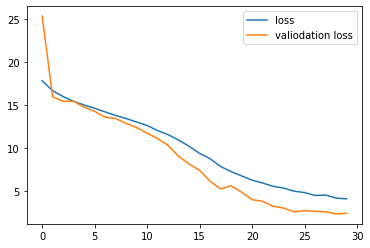

In [55]:
# loss do modelo
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

axs.plot(history.history['loss'], label='loss')
axs.plot(history.history['val_loss'], label='valiodation loss')
axs.legend()

plt.show()

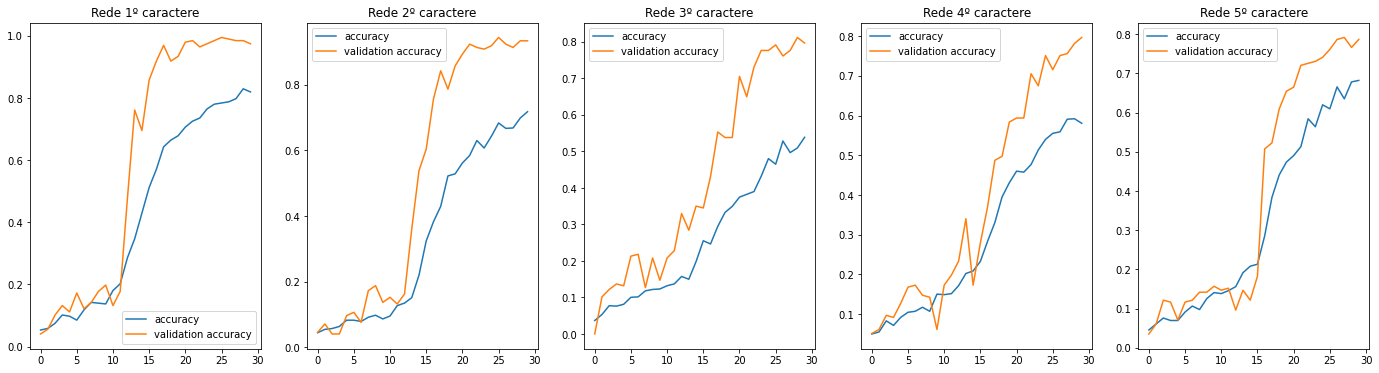

In [56]:
# accuracy de cada rede de cada caractere
fig, axs = plt.subplots(1, 5, figsize=(24, 6))

axs[0].set_title('Rede 1º caractere')
axs[0].plot(history.history['dense_2_acc'], label='accuracy')
axs[0].plot(history.history['val_dense_2_acc'], label='validation accuracy')
axs[0].legend()

axs[1].set_title('Rede 2º caractere')
axs[1].plot(history.history['dense_4_acc'], label='accuracy')
axs[1].plot(history.history['val_dense_4_acc'], label='validation accuracy')
axs[1].legend()

axs[2].set_title('Rede 3º caractere')
axs[2].plot(history.history['dense_6_acc'], label='accuracy')
axs[2].plot(history.history['val_dense_6_acc'], label='validation accuracy')
axs[2].legend()

axs[3].set_title('Rede 4º caractere')
axs[3].plot(history.history['dense_8_acc'], label='accuracy')
axs[3].plot(history.history['val_dense_8_acc'], label='validation accuracy')
axs[3].legend()

axs[4].set_title('Rede 5º caractere')
axs[4].plot(history.history['dense_10_acc'], label='accuracy')
axs[4].plot(history.history['val_dense_10_acc'], label='validation accuracy')
axs[4].legend()

plt.show()

In [57]:
# predição da imagem 8n5p3.png (questão)

DIR_TARGET = './dataset/samples/8n5p3.png'

original_image = cv2.imread(DIR_TARGET, cv2.IMREAD_GRAYSCALE)  # carrega a imagem
target_image = original_image / 255.  # valores da imagem entre 0 e 1

# reshape na imagem para passar pelo modelo
# 50 x 200 para 1 x 50 x 200 x 1
target_image = target_image[np.newaxis, :, :, np.newaxis]

# predição da imagem
predicts = np.array(model.predict(target_image))
predicts = np.reshape(predicts, (5, 36))

# tradução do output do predict para os caracteres do captch
captch = ''
for predict in predicts:
    max_value = predict.max()
    
    if max_value == 0.:
        captch += '-'
        continue
    
    max_index = predict.argmax()
    captch += TARGET_WORDS[max_index]

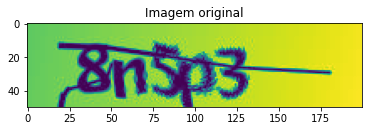

In [58]:
# visualização da imagem original
fig, axs = plt.subplots(1, 1, figsize=(6, 4))

axs.set_title('Imagem original')
axs.imshow(original_image)

plt.show()

In [59]:
print(f'Captch extraído da imagem {DIR_TARGET} foi: {captch}')

Captch extraído da imagem ./dataset/samples/8n5p3.png foi: 8n5p3
